In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
data1=pd.read_csv("datasets/used_cars.csv")
data1.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [70]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [71]:
data1.nunique()

brand             57
model           1898
model_year        34
milage          2818
fuel_type          7
engine          1146
transmission      62
ext_col          319
int_col          156
accident           2
clean_title        1
price           1569
dtype: int64

In [72]:
(data1.isnull().sum()/(len(data1)))*100

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        4.240459
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         2.818658
clean_title     14.866550
price            0.000000
dtype: float64

In [73]:
from datetime import date
data1['car_age']=date.today().year-data1['model_year']
data1.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",11
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005",3
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598",2
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500",9
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999",3


In [74]:
cat_cols=data1.select_dtypes(include=['object']).columns
num_cols=data1.select_dtypes(include=np.number).columns.tolist()
print("Categorial variables:")
print(cat_cols)
print("numerical variables:")
print(num_cols)

Categorial variables:
Index(['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title', 'price'],
      dtype='object')
numerical variables:
['model_year', 'car_age']


model_year
Skew : -1.09


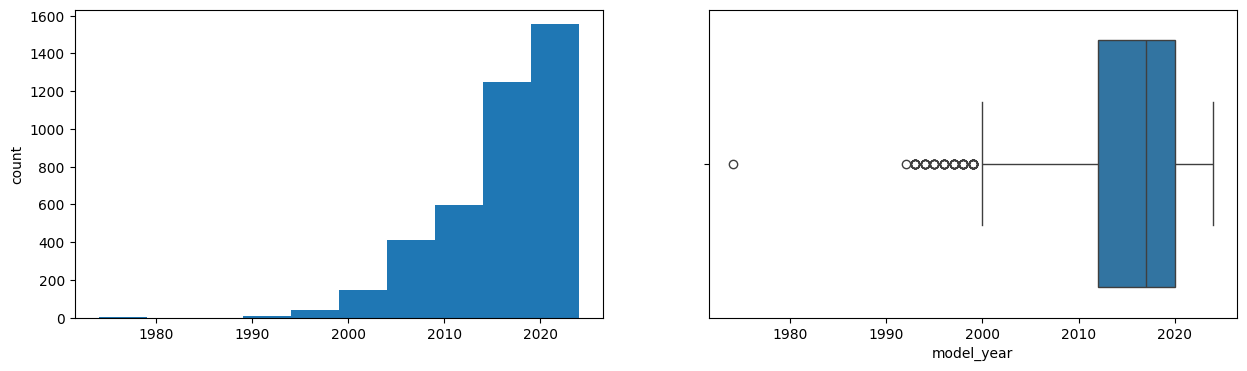

car_age
Skew : 1.09


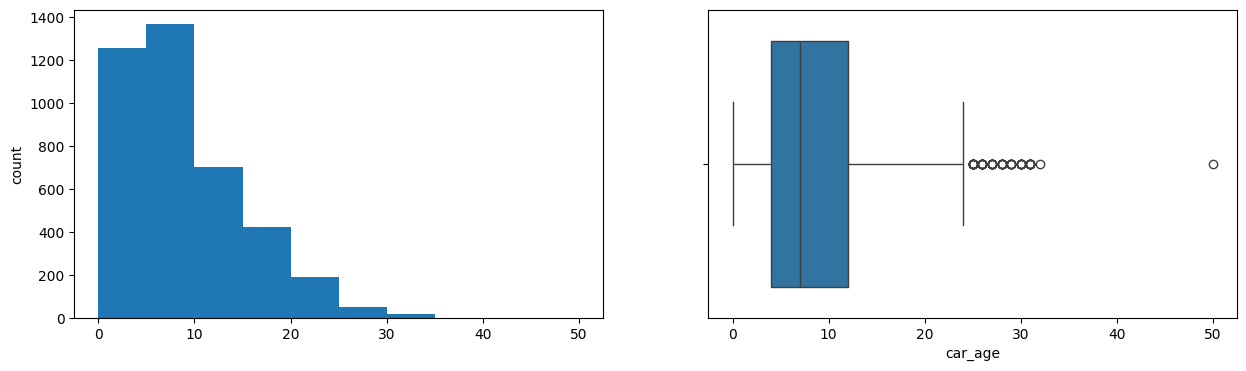

In [75]:
for col in num_cols:
    print(col)
    print('Skew :', round(data1[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data1[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data1[col])
    plt.show()

In [76]:
data1['milage']=data1['milage'].str.replace('mi.','').str.replace(',','')
data1['milage']=data1['milage'].astype(int)
data1['price']=data1['price'].str.replace('$','').str.replace(',','')
data1['price']=data1['price'].astype(int)
data1.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,11
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005,3
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598,2
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500,9
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999,3


ValueError: Could not interpret value `fuel_type` for `x`. Value is a string, but `data` was not passed.

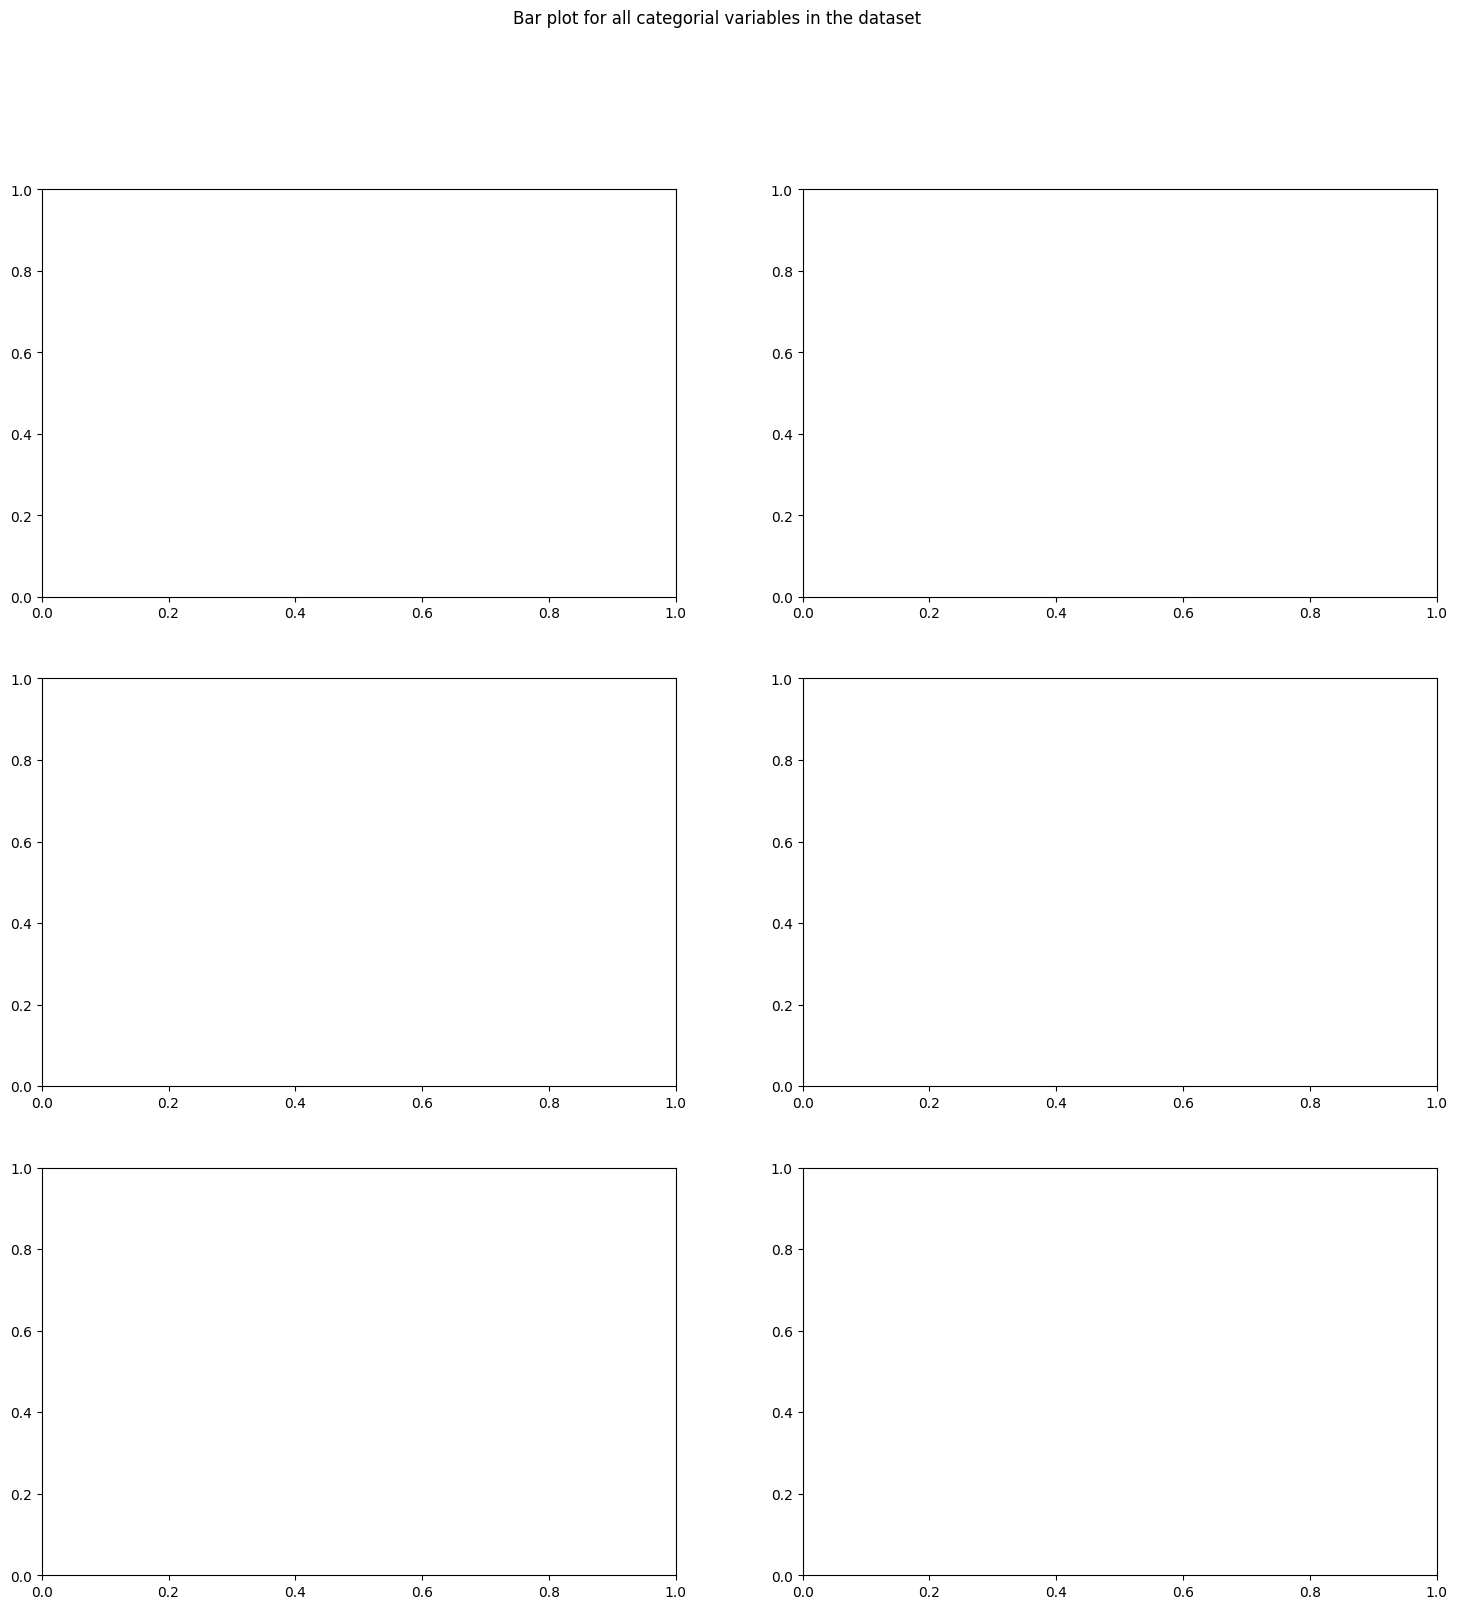

In [77]:
fig,axes=plt.subplots(3,2,figsize=(18,18))
fig.suptitle('Bar plot for all categorial variables in the dataset')
sns.countplot(ax=axes[0,0], x='fuel_type',data1=data1,color='blue',order=data1['fuel_type'].value_counts().index);
sns.countplot(ax=axes[0,1], x='transmission',data1=data1,color='blue',order=data1['transmission'].value_counts().index);
sns.countplot(ax=axes[1,1], x='accident',data1=data1,color='blue',order=data1['accident'].value_counts().index);
sns.countplot(ax=axes[2,0], x='brand',data1=data1,color='blue',order=data1['accident'].value_counts().index);
sns.countplot(ax=axes[2,1], x='model',data1=data1,color='blue',order=data1['model'].value_counts().index);
axes[1,1].tick_params(labelrotation=45);
axes[2,0].tick_params(labelrotation=90);
axes[2,1].tick_params(labelrotation=90);